<a href="https://colab.research.google.com/github/freezigs/---Anksiyete-Tahmin-Uygulamas-/blob/main/%C3%B6%C4%9Frencide_yapay_zeka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import pandas as pd
from google.colab import drive


dosya_yolu = '/content/drive/MyDrive/Colab Notebooks/ai_assistant_usage_student_life.csv'


df = pd.read_csv(dosya_yolu)



      SessionID   StudentLevel        Discipline SessionDate  \
0  SESSION00001  Undergraduate  Computer Science  2024-11-03   
1  SESSION00002  Undergraduate        Psychology  2024-08-25   
2  SESSION00003  Undergraduate          Business  2025-01-12   
3  SESSION00004  Undergraduate  Computer Science  2025-05-06   
4  SESSION00005  Undergraduate        Psychology  2025-03-18   

   SessionLengthMin  TotalPrompts  TaskType  AI_AssistanceLevel  \
0             31.20            11  Studying                   2   
1             13.09             6  Studying                   3   
2             19.22             5    Coding                   3   
3              3.70             1    Coding                   3   
4             28.12             9   Writing                   3   

           FinalOutcome  UsedAgain  SatisfactionRating  
0  Assignment Completed       True                 1.0  
1  Assignment Completed       True                 2.0  
2  Assignment Completed       True       

In [ ]:
# İlk 5 satırı göster
df.head()


,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [ ]:
df.describe(include='all')


,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
count,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000.000000,10000,10000,10000.000000
unique,10000,3,7,366,NaN,NaN,6,NaN,4,2,NaN
top,SESSION09984,Undergraduate,Biology,2025-01-19,NaN,NaN,Writing,NaN,Assignment Completed,True,NaN
freq,1,5978,1458,41,NaN,NaN,3101,NaN,4768,7064,NaN
mean,NaN,NaN,NaN,NaN,19.846467,5.607500,NaN,3.479500,NaN,NaN,3.417780
std,NaN,NaN,NaN,NaN,13.897302,4.648764,NaN,0.991805,NaN,NaN,1.143331
min,NaN,NaN,NaN,NaN,0.030000,1.000000,NaN,1.000000,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,9.630000,2.000000,NaN,3.000000,NaN,NaN,2.600000
50%,NaN,NaN,NaN,NaN,16.650000,4.000000,NaN,4.000000,NaN,NaN,3.500000
75%,NaN,NaN,NaN,NaN,26.670000,8.000000,NaN,4.000000,NaN,NaN,4.400000


In [ ]:
df.shape


(10000, 11)

In [ ]:
df.dtypes


,0
SessionID,object
StudentLevel,object
Discipline,object
SessionDate,object
SessionLengthMin,float64
TotalPrompts,int64
TaskType,object
AI_AssistanceLevel,int64
FinalOutcome,object
UsedAgain,bool


In [ ]:
df.nunique()


,0
SessionID,10000
StudentLevel,3
Discipline,7
SessionDate,366
SessionLengthMin,4078
TotalPrompts,37
TaskType,6
AI_AssistanceLevel,5
FinalOutcome,4
UsedAgain,2


In [ ]:
df.isnull().sum()


,0
SessionID,0
StudentLevel,0
Discipline,0
SessionDate,0
SessionLengthMin,0
TotalPrompts,0
TaskType,0
AI_AssistanceLevel,0
FinalOutcome,0
UsedAgain,0


In [ ]:
# Rastgele 5 satır seçer
df.sample(5)


,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
5724,SESSION05725,Undergraduate,Computer Science,2024-11-13,15.38,4,Writing,4,Gave Up,True,3.8
2430,SESSION02431,Graduate,Psychology,2024-09-13,8.77,2,Homework Help,4,Assignment Completed,True,3.3
6886,SESSION06887,Undergraduate,Biology,2025-04-30,37.49,8,Writing,3,Assignment Completed,True,2.1
2883,SESSION02884,Undergraduate,Math,2024-08-30,17.55,5,Studying,2,Idea Drafted,True,1.5
7766,SESSION07767,Undergraduate,Computer Science,2024-11-01,34.17,11,Studying,4,Idea Drafted,False,3.1


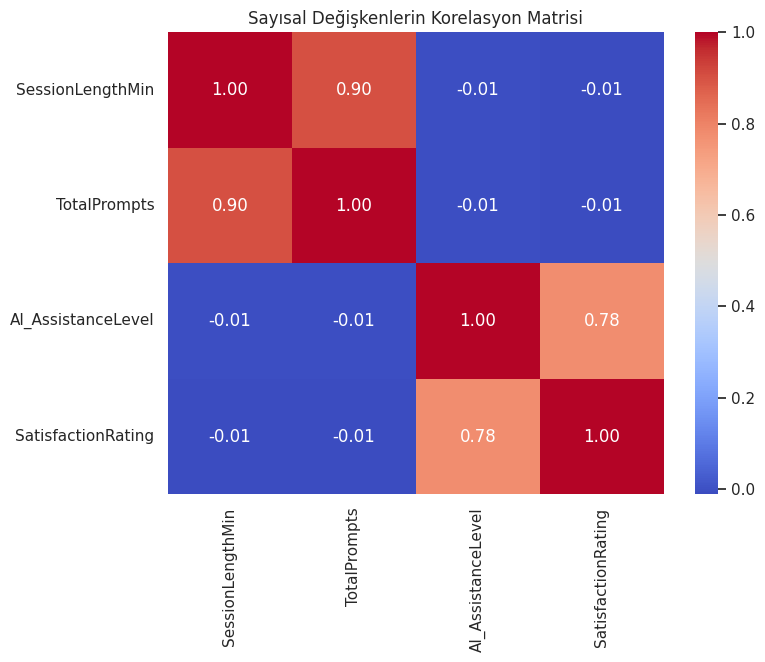

In [ ]:
# Sadece sayısal sütunları seç
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Korelasyon matrisini hesapla
corr_matrix = numeric_df.corr()

# Görselleştir
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Sayısal Değişkenlerin Korelasyon Matrisi')
plt.show()


StudentLevel
Graduate         3.419048
High School      3.428071
Undergraduate    3.413868
Name: SatisfactionRating, dtype: float64


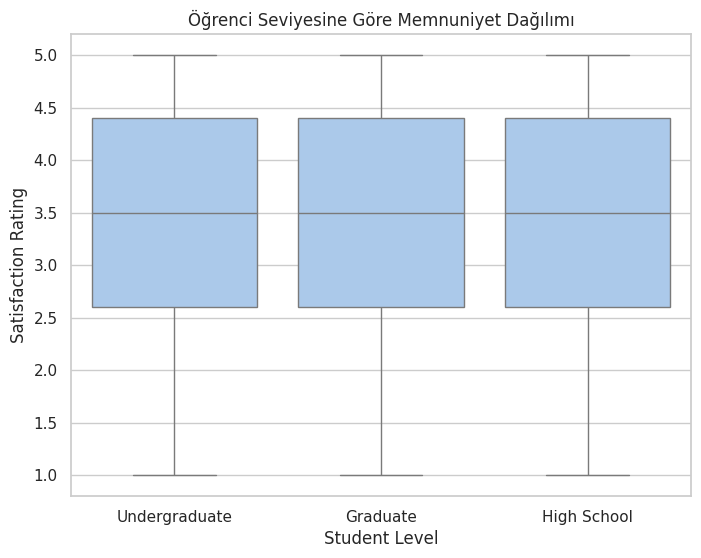

In [ ]:

# Ortalama memnuniyet skorları
ortalama_memnuniyet = df.groupby('StudentLevel')['SatisfactionRating'].mean()
print(ortalama_memnuniyet)

# Görselleştirme (boxplot ile dağılımı görelim)
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='StudentLevel', y='SatisfactionRating')
plt.title('Öğrenci Seviyesine Göre Memnuniyet Dağılımı')
plt.xlabel('Student Level')
plt.ylabel('Satisfaction Rating')
plt.show()


/tmp/ipython-input-56-3678900800.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yardim_memnuniyet, x="AI_AssistanceLevel", y="SatisfactionRating", palette="Blues")


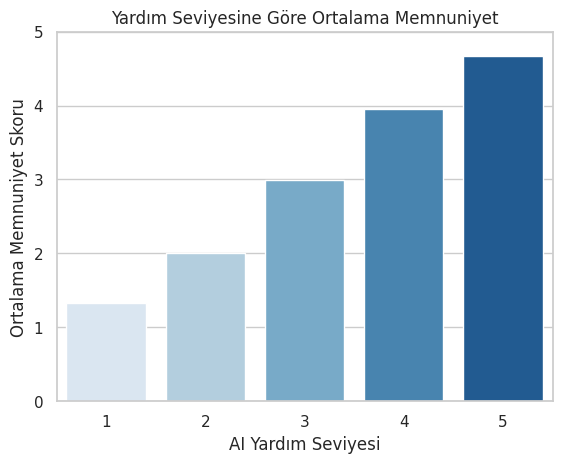

In [ ]:
# Yardım seviyesine göre ortalama memnuniyet
yardim_memnuniyet = df.groupby("AI_AssistanceLevel")["SatisfactionRating"].mean().reset_index()

# Bar grafiği
sns.barplot(data=yardim_memnuniyet, x="AI_AssistanceLevel", y="SatisfactionRating", palette="Blues")

plt.title("Yardım Seviyesine Göre Ortalama Memnuniyet")
plt.xlabel("AI Yardım Seviyesi")
plt.ylabel("Ortalama Memnuniyet Skoru")
plt.ylim(0, 5)  # Çünkü memnuniyet 1-5 arası
plt.show()

In [ ]:
df["SessionDate"] = pd.to_datetime(df["SessionDate"])

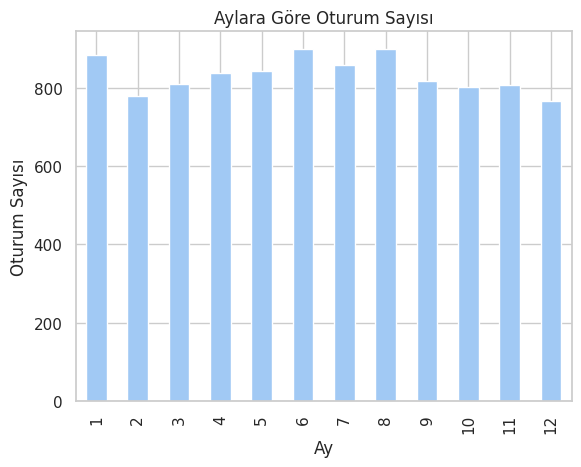

In [ ]:
df['SessionDate'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.title('Aylara Göre Oturum Sayısı')
plt.xlabel('Ay')
plt.ylabel('Oturum Sayısı')
plt.show()

/tmp/ipython-input-59-3016686507.py:39: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


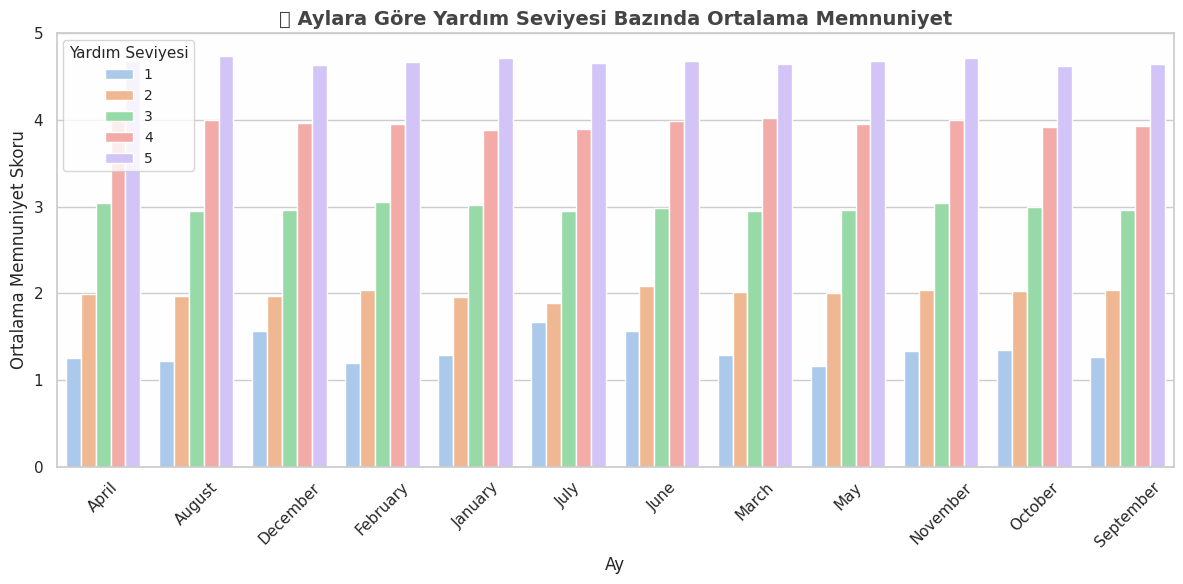

In [ ]:
# Eğer tarih sütunu string ise datetime'a çeviriyoruz
df["SessionDate"] = pd.to_datetime(df["SessionDate"])

# Ay bilgisini çıkart
df["Month"] = df["SessionDate"].dt.strftime("%B")  # İsimle istersek
df["Month_num"] = df["SessionDate"].dt.month       # Sıralama için numara

# Ay sırasına göre sıralı tutmak için
df = df.sort_values("Month_num")

# Aylık yardım seviyesi ve memnuniyet ortalamasını grupla
monthly_group = df.groupby(["Month", "AI_AssistanceLevel"])["SatisfactionRating"].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid", palette="pastel")

# Barplot
barplot = sns.barplot(
    data=monthly_group,
    x="Month",
    y="SatisfactionRating",
    hue="AI_AssistanceLevel",
    palette="pastel"
)

# Estetik ayarlar
plt.title("📅 Aylara Göre Yardım Seviyesi Bazında Ortalama Memnuniyet", fontsize=14, fontweight="bold", color="#444")
plt.xlabel("Ay", fontsize=12)
plt.ylabel("Ortalama Memnuniyet Skoru", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.legend(title="Yardım Seviyesi", title_fontsize=11, fontsize=10)
plt.gca().set_facecolor('#fefefe')
plt.tight_layout()
plt.show()

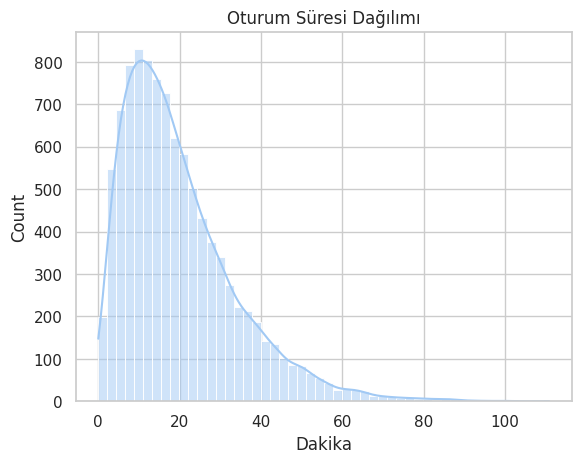

In [ ]:
sns.histplot(df['SessionLengthMin'], bins=50, kde=True)
plt.title('Oturum Süresi Dağılımı')
plt.xlabel('Dakika')
plt.show()

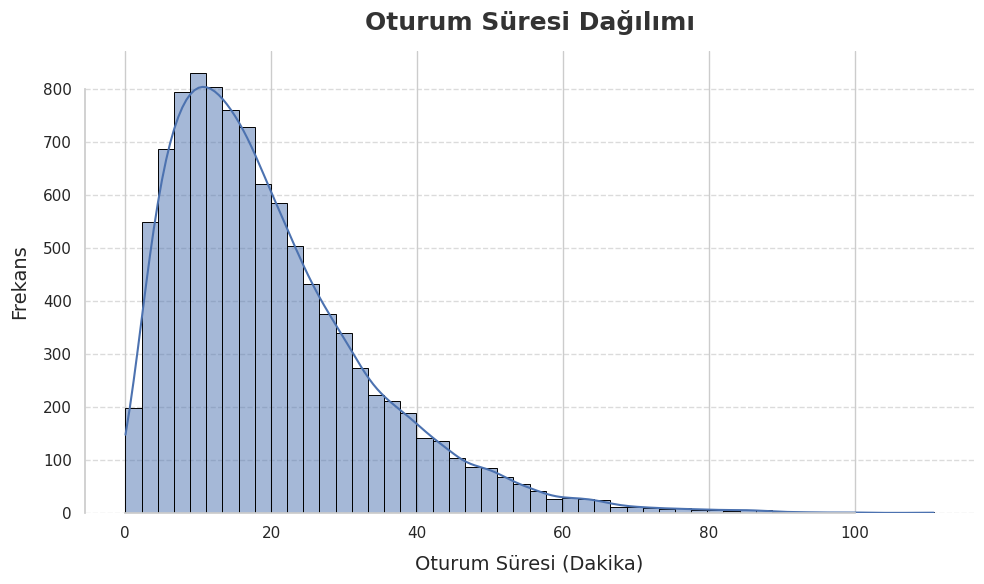

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['SessionLengthMin'], bins=50, kde=True, color='#4c72b0', edgecolor='black', linewidth=0.7)

plt.title('Oturum Süresi Dağılımı', fontsize=18, fontweight='bold', color='#333333', pad=15)
plt.xlabel('Oturum Süresi (Dakika)', fontsize=14, labelpad=10)
plt.ylabel('Frekans', fontsize=14, labelpad=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(trim=True)

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Frekans')

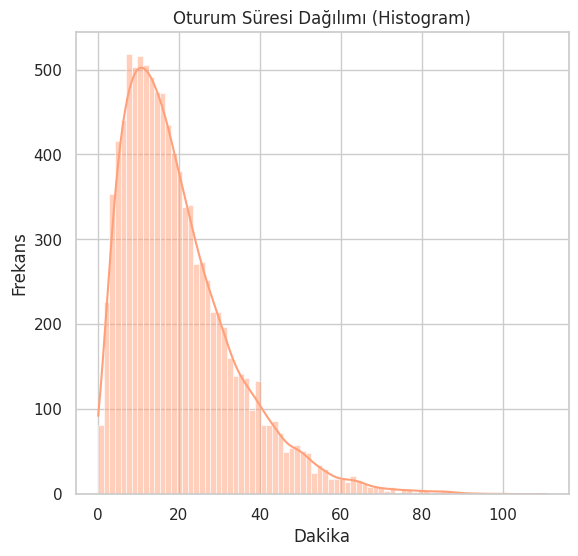

In [ ]:
plt.figure(figsize=(14,6))

# Histogram
plt.subplot(1,2,1)
sns.histplot(df['SessionLengthMin'], bins=80, kde=True, color="#FFA07A")  # Pastel salmon rengi
plt.title('Oturum Süresi Dağılımı (Histogram)')
plt.xlabel('Dakika')
plt.ylabel('Frekans')


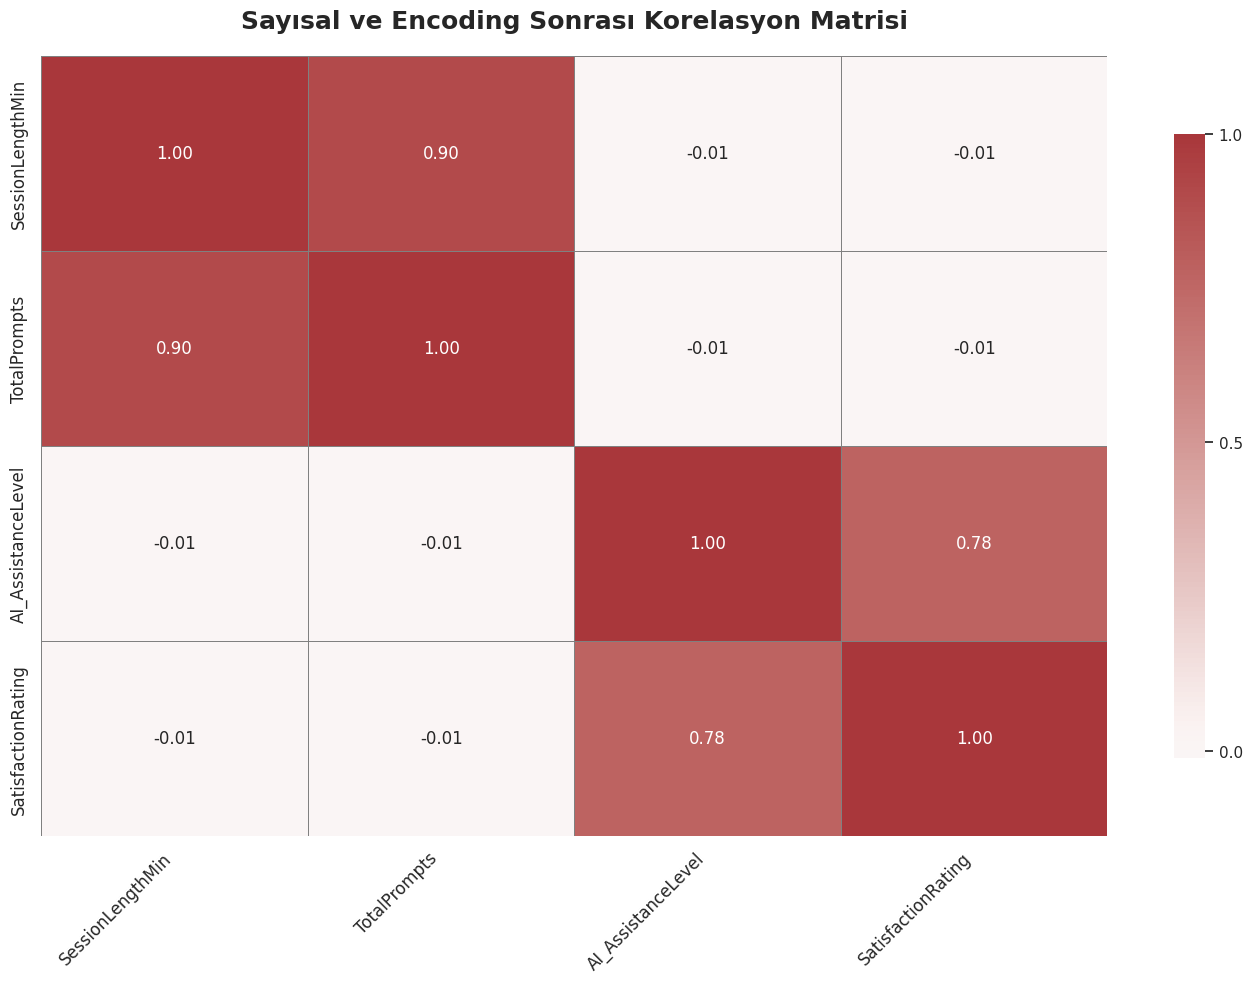

In [ ]:
# Sayısal sütunları seç (encoding sonrası sütunlar dahil)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(14,10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='vlag',            # Renk paleti: kırmızı-mavi dengesi
    center=0,               # Renk skalasını 0 etrafında simetrik yapar
    linewidths=0.5,         # Hücreler arası çizgi kalınlığı
    linecolor='gray',       # Hücre çizgi rengi
    cbar_kws={"shrink": .8, "ticks": [-1, -0.5, 0, 0.5, 1]}  # Renk barı ayarları
)

plt.title('Sayısal ve Encoding Sonrası Korelasyon Matrisi', fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Kopya oluşturmak istersen (orijinal veriye zarar vermemek için)
df_le = df.copy()

# LabelEncoder nesnesi oluştur
le = LabelEncoder()

# Kodlanacak sütunlar
label_cols = ['Discipline', 'TaskType', 'FinalOutcome']

# Her sütuna uygulama
for col in label_cols:
    df_le[col] = le.fit_transform(df_le[col])

# Kontrol etmek istersen ilk birkaç satırı yazdır:
print(df_le[label_cols].head())


      Discipline  TaskType  FinalOutcome
2491           5         4             3
2489           1         5             0
4146           1         5             0
4179           2         2             0
4142           2         2             0


In [ ]:
def oturum_kategorisi(sure):
    if sure < 10:
        return 'Kısa'
    elif sure < 30:
        return 'Orta'
    else:
        return 'Uzun'

df['SessionLengthCategory'] = df['SessionLengthMin'].apply(oturum_kategorisi)


In [ ]:
# Prompt sayısını kategorilere ayıralım
df['PromptLevel'] = pd.cut(df['TotalPrompts'], bins=[0, 3, 7, df['TotalPrompts'].max()],
                           labels=['Düşük', 'Orta', 'Yüksek'], right=False)

# Kategorilerin dağılımına bakalım
print(df['PromptLevel'].value_counts())


PromptLevel
Orta      3976
Yüksek    3151
Düşük     2871
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Normalize veya standardize edilecek sayısal sütunları seç
numeric_cols = ['SessionLengthMin', 'TotalPrompts', 'AI_AssistanceLevel', 'SatisfactionRating']

# StandardScaler örneği (ortalama=0, std=1)
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# MinMaxScaler örneği (0-1 arası)
minmax_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[numeric_cols] = minmax_scaler.fit_transform(df[numeric_cols])

# İlk 5 satırı incelemek için:
print("Standardize edilmiş veri:\n", df_standardized[numeric_cols].head())
print("\nMin-Max normalize edilmiş veri:\n", df_minmax[numeric_cols].head())


Standardize edilmiş veri:
       SessionLengthMin  TotalPrompts  AI_AssistanceLevel  SatisfactionRating
2491          3.187363      2.020531            0.524827            0.771661
2489          0.919184      0.084435           -0.483486           -0.015552
4146          2.390046      2.235652            1.533139            1.383937
4179          0.889680      2.020531           -0.483486           -1.415041
4142         -0.132872      0.084435            0.524827            0.771661

Min-Max normalize edilmiş veri:
       SessionLengthMin  TotalPrompts  AI_AssistanceLevel  SatisfactionRating
2491          0.578715      0.368421                0.75               0.825
2489          0.294187      0.131579                0.50               0.600
4146          0.478697      0.394737                1.00               1.000
4179          0.290486      0.368421                0.50               0.200
4142          0.162213      0.131579                0.75               0.825


/tmp/ipython-input-70-2272011803.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_prompts, x='StudentLevel', y='TotalPrompts', palette='viridis')


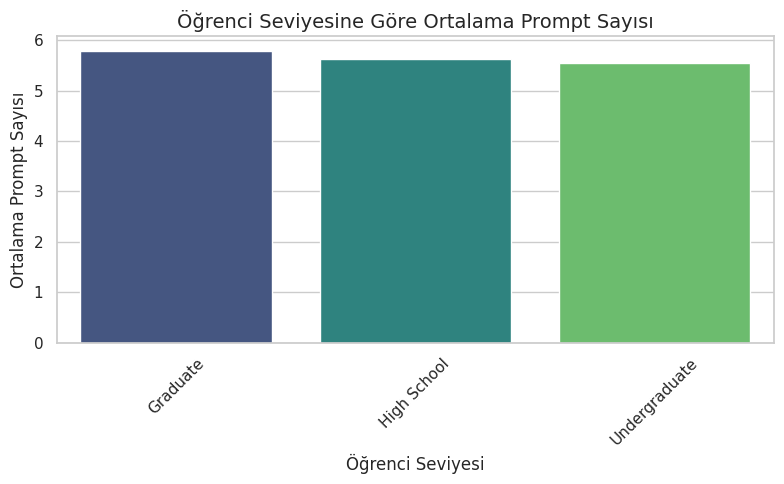

In [ ]:
# Öğrenci seviyesine göre ortalama prompt sayısı
avg_prompts = df.groupby('StudentLevel')['TotalPrompts'].mean().reset_index()

# Sıralama (isteğe bağlı daha estetik için)
avg_prompts = avg_prompts.sort_values(by='TotalPrompts', ascending=False)

# Görselleştirme
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_prompts, x='StudentLevel', y='TotalPrompts', palette='viridis')
plt.title('Öğrenci Seviyesine Göre Ortalama Prompt Sayısı', fontsize=14)
plt.xlabel('Öğrenci Seviyesi')
plt.ylabel('Ortalama Prompt Sayısı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df_encoded = pd.get_dummies(df, columns=[
    'StudentLevel', 'Discipline', 'TaskType', 'FinalOutcome'], drop_first=True)
